In [4]:
from dataclasses import dataclass
import pandas as pd
import torch
from  PIL import Image
from torch.utils.data import Dataset
from pathlib import Path
from typing import List, Tuple

In [5]:
data_dir = r"E:\playground\ai\datasets\LLaVA-CC3M-Pretrain-595K"

In [6]:
class LlavaDataset(Dataset):
    def __init__(self, data_dir: str) -> None:
        super().__init__()
        self.chat_data, self.image_dir = self.build_dataset(data_dir)
        
    def build_dataset(self, data_dir) -> Tuple[List, Path]:
        data_dir = Path(data_dir)
        chat_file = data_dir.joinpath("chat.json")
        image_dir = data_dir.joinpath("images_dl")
        
        chat_data = pd.read_json(chat_file).to_dict(orient='records')
        
        return chat_data, image_dir
    
    def __len__(self):
        return len(self.chat_data)
    
    def __getitem__(self, index) -> tuple[str, str, Path]:
        cur_data = self.chat_data[index]
        
        human_input = cur_data['conversations'][0]['value']
        gpt_output = cur_data['conversations'][1]['value']
        image_path = self.image_dir.joinpath(cur_data.get('image'))
        
        return (human_input, gpt_output, image_path)
        
test_llava_dataset = LlavaDataset(data_dir=data_dir)

In [7]:
len(test_llava_dataset)

595375

In [39]:
test_llava_dataset[0]

('Provide a brief description of the given image.\n<image>',
 'olive oil is a healthy ingredient used liberally .',
 WindowsPath('E:/playground/ai/datasets/LLaVA-CC3M-Pretrain-595K/images_dl/GCC_train_002582585.jpg'))

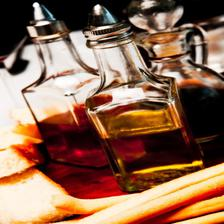

In [40]:
Image.open(test_llava_dataset[0][2])

In [2]:
chat_file = Path(data_dir).joinpath("chat.json")
chat_data = pd.read_json(chat_file)

# chat_data.shape

(595375, 3)

In [4]:
chat_data.head(n=20)

,id,image,conversations
0,GCC_train_002582585,GCC_train_002582585.jpg,"[{'from': 'human', 'value': 'Provide a brief d..."
1,GCC_train_002429825,GCC_train_002429825.jpg,"[{'from': 'human', 'value': '<image> Write a t..."
2,GCC_train_000190697,GCC_train_000190697.jpg,"[{'from': 'human', 'value': 'Share a concise i..."
3,GCC_train_002503829,GCC_train_002503829.jpg,"[{'from': 'human', 'value': 'Relay a brief, cl..."
4,GCC_train_000530863,GCC_train_000530863.jpg,"[{'from': 'human', 'value': '<image> Render a ..."
5,GCC_train_001970366,GCC_train_001970366.jpg,"[{'from': 'human', 'value': 'Create a compact ..."
6,GCC_train_001885390,GCC_train_001885390.jpg,"[{'from': 'human', 'value': '<image> Render a ..."
7,GCC_train_001764002,GCC_train_001764002.jpg,"[{'from': 'human', 'value': '<image> Give a sh..."
8,GCC_train_002554598,GCC_train_002554598.jpg,"[{'from': 'human', 'value': 'Create a compact ..."
9,GCC_train_001948583,GCC_train_001948583.jpg,"[{'from': 'human', 'value': '<image> Summarize..."


In [12]:
q = chat_data.iloc[10]['conversations'][0]['value']
a = chat_data.iloc[10]['conversations'][1]['value']

q, a

('<image>\nProvide a brief description of the given image.',
 'organization is synonymous with azaleas .')

In [13]:
chat_data.iloc[10]['image']

'GCC_train_000177248.jpg'

In [25]:
image_dir = Path(data_dir).joinpath("images_dl")
image_dir

WindowsPath('E:/playground/ai/datasets/LLaVA-CC3M-Pretrain-595K/images_dl')

In [26]:
test_image_file = image_dir.joinpath(chat_data.iloc[10]['image'])
test_image_file

WindowsPath('E:/playground/ai/datasets/LLaVA-CC3M-Pretrain-595K/images_dl/GCC_train_000177248.jpg')

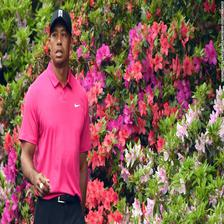

In [27]:
Image.open(test_image_file)

In [52]:
from transformers import AutoProcessor

llava_model_name_or_path = 'show_model/model001'
llava_processor = AutoProcessor.from_pretrained(llava_model_name_or_path)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Qwen2Tokenizer'. 
The class this function is called from is 'CLIPTokenizerFast'.


In [53]:
test002 = test_llava_dataset[12345]
test002 

('Describe the image concisely.\n<image>',
 'illustration of a gray goose on a white background',
 WindowsPath('E:/playground/ai/datasets/LLaVA-CC3M-Pretrain-595K/images_dl/GCC_train_002160298.jpg'))

In [74]:
from dataclasses import dataclass

@dataclass
class QaImageOutput:
    q_input_ids: torch.Tensor
    pixel_values: torch.Tensor
    a_intput_ids: torch.Tensor

def build_qaimage(processor: AutoProcessor, q_text: str, a_text: str, image_path: Path):
    # instruction or input or question
    messages = [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": q_text},
    ]
    prompt = processor.tokenizer.apply_chat_template(
        messages, tokenize=False, add_generation_prompt=True
    )
    image_file = image_path  # "000000039769.jpg"

    raw_image = Image.open(image_file)
    inputs = processor(prompt, raw_image, return_tensors="pt")  # .to(0, torch.float16)

    a_input_ids = processor.tokenizer(
        a_text,
        return_tensors="pt",
        padding="longest",
        truncation=True,
    )["input_ids"]

    return QaImageOutput(
        q_input_ids=inputs.get("input_ids"),
        pixel_values=inputs.get("pixel_values"),
        a_intput_ids=a_input_ids
    )

c = build_qaimage(llava_processor, test002[0], test002[1], image_path=test002[2])
# c.keys()
c

QaImageOutput(q_input_ids=tensor([[151644,   8948,    198,   2610,    525,    264,  10950,  17847,     13,
         151645,    198, 151644,    872,    198,  74785,    279,   2168,   3529,
            285,    974,    624, 151646, 151645,    198, 151644,  77091,    198]]), pixel_values=tensor([[[[1.9011, 1.9011, 1.9011,  ..., 1.9011, 1.9011, 1.9011],
          [1.9011, 1.9011, 1.9011,  ..., 1.9011, 1.9011, 1.9011],
          [1.9157, 1.9157, 1.9157,  ..., 1.9157, 1.9157, 1.9157],
          ...,
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303]],

         [[2.0449, 2.0449, 2.0449,  ..., 2.0449, 2.0449, 2.0449],
          [2.0449, 2.0449, 2.0449,  ..., 2.0449, 2.0449, 2.0449],
          [2.0599, 2.0599, 2.0599,  ..., 2.0599, 2.0599, 2.0599],
          ...,
          [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
          [2.0749, 2.07

In [55]:
c.a_intpu_ids

tensor([[82618,   367,   315,   264, 17545, 62137,   389,   264,  4158,  4004]])

In [56]:
c.q_input_ids

tensor([[151644,   8948,    198,   2610,    525,    264,  10950,  17847,     13,
         151645,    198, 151644,    872,    198,  74785,    279,   2168,   3529,
            285,    974,    624, 151646, 151645,    198, 151644,  77091,    198]])

In [57]:
c['input_ids']

TypeError: 'QaImageOutput' object is not subscriptable

In [58]:
llava_processor.decode([151644,   8948,    198,   2610,    525,    264,  10950,  17847,     13,
         151645,    198, 151644,    872,    198,  74785,    279,   2168,   3529,
            285,    974,    624, 151646, 151645,    198, 151644,  77091,    198])

'< | i m _ s t a r t | > s y s t e m \n Y o u   a r e   a   h e l p f u l   a s s i s t a n t . < | i m _ e n d | > \n < | i m _ s t a r t | > u s e r \n D e s c r i b e   t h e   i m a g e   c o n c i s e l y . \n < i m a g e > < | i m _ e n d | > \n < | i m _ s t a r t | > a s s i s t a n t'

In [59]:
c['pixel_values'].shape

TypeError: 'QaImageOutput' object is not subscriptable

In [60]:
c['attention_mask']

TypeError: 'QaImageOutput' object is not subscriptable

In [61]:
llava_processor.decode([82618,   367,   315,   264, 17545, 62137,   389,   264,  4158,  4004])

'i l l u s t r a t i o n   o f   a   g r a y   g o o s e   o n   a   w h i t e   b a c k g r o u n d'

In [62]:
q = [101, 102, 103]
a = [201, 202, 203, 204]

input_ids = [101, 102, 103, 201, 202, 203, 204, 'eos_id']
labels = [-100, -100, -100, 201, 202, 203, 204, 'eos_id']

In [63]:
c.q_input_ids.shape, c.a_intpu_ids.shape

(torch.Size([1, 27]), torch.Size([1, 10]))

In [64]:
torch.tensor(data=llava_processor.tokenizer.eos_token_id).reshape(1, -1).shape

torch.Size([1, 1])

In [80]:
class TrainLLavaModelCollator:
    def __init__(self, processor:AutoProcessor, IGNORE_INDEx:int):
        self.processor = processor
        self.ignore_index = IGNORE_INDEx
        
    def convert_one_piece(self, q_input_ids: torch.Tensor, a_input_ids: torch.Tensor):
        input_ids = torch.concat(
            [
                q_input_ids,
                a_input_ids,
                torch.tensor(self.processor.tokenizer.eos_token_id).reshape(1, -1),
            ],
            axis=1,
        )
        
        labels = torch.concat(
            [
                torch.full(q_input_ids.shape, self.ignore_index),
                a_input_ids,
                torch.tensor(self.processor.tokenizer.eos_token_id).reshape(1, -1),
            ],
            axis=1,
        )
        
        return input_ids, labels
    
    def __call__(self, features: List):
        input_ids_list = []
        labels_list = []
        pixel_values = []
        max_input_len_list = []
        
        for feature in features:
            qaimage_output = build_qaimage(
                self.processor, feature[0], feature[1], feature[2]
            )
            temp_input_ids, temp_labels = self.convert_one_piece(
                qaimage_output.q_input_ids, qaimage_output.a_intput_ids
            )
            
            max_input_len_list.append(temp_input_ids.shape[1])
            input_ids_list.append(temp_input_ids)
            labels_list.append(temp_labels)
            pixel_values.append(qaimage_output.pixel_values)
            
        max_input_len = max(max_input_len_list)
        
      
        
        return {
            "input_ids": input_ids_list,
            "labels": labels_list,
            "pixel_values": pixel_values,
            "attention_mask": None
        }
    
    
tlmc = TrainLLavaModelCollator(llava_processor, -100)
# tlmc.convert_one_piece(c.q_input_ids, c.a_intpu_ids)

d = tlmc([test_llava_dataset[1], test_llava_dataset[100], test_llava_dataset[200]])
d.keys()
        

dict_keys(['input_ids', 'labels', 'pixel_values', 'attention_mask'])

In [79]:
d['input_ids']

[tensor([[151644,   8948,    198,   2610,    525,    264,  10950,  17847,     13,
          151645,    198, 151644,    872,    198, 151646,    198,   7985,    264,
           50537,    714,  38219,  12126,    315,    279,   6802,     13, 151645,
             198, 151644,  77091,    198,     18,     67,   4621,  78424,  27790,
             315,  26618,  45620,  15430,  20748,  17738,    659, 151645]]),
 tensor([[151644,   8948,    198,   2610,    525,    264,  10950,  17847,     13,
          151645,    198, 151644,    872,    198,   6740,    352,    264,   9814,
              11,   2797,   2692,    315,    279,   6802,   6839,    624, 151646,
          151645,    198, 151644,  77091,    198,    266,   2544,  54236,   1293,
            1154,    419,  44486,    481,  11466,    572,     79,   1231,    387,
             825,    315,    279,  24632,  40811,    304,    279,   1879, 151645]]),
 tensor([[151644,   8948,    198,   2610,    525,    264,  10950,  17847,     13,
          151645, 

In [32]:
c.q_input_ids.shape

torch.Size([1, 27])